In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier


In [2]:
data = pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv('https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


a classification problem
maybe logistic, LASSO and random forest
confision matrix, Misclassification rate

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull())))
describe_data(data)

Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
Rows and Columns:
(614, 13)
Column Names:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Null Values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Statu

In [6]:
dat = data.drop('Loan_ID', axis=1)
objects = []
for c in dat.columns:
    if str(dat[c].dtype) == 'object':
        objects.append(c)

X_ = dat.drop(objects, axis = 1).astype('float64')
dummies = pd.get_dummies(dat[objects], drop_first=True)
X = pd.concat([X_, dummies], axis = 1)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106.0,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072.0,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583.0,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [7]:
test = test.drop('Loan_ID', axis=1)
objects = []
for c in test.columns:
    if str(test[c].dtype) == 'object':
        objects.append(c)

Xt_ = test.drop(objects, axis = 1).astype('float64')
dummies = pd.get_dummies(test[objects], drop_first=True)
Xt = pd.concat([Xt_, dummies], axis = 1)
Xt

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076.0,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000.0,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340.0,2546.0,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,3276.0,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,4158.0,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,3250.0,1993.0,126.0,360.0,NaN,1,0,0,0,0,0,0,1,0
365,5000.0,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [8]:
X = X.fillna(0)

# Feature engineering
add a column

In [9]:
X['total_income'] = X['ApplicantIncome'] + X['CoapplicantIncome']

In [10]:
Xt['total_income'] = Xt['ApplicantIncome'] + Xt['CoapplicantIncome']

In [11]:
train, test = train_test_split(X, test_size = 0.25)
val, test = train_test_split(test, test_size = 0.25)
X_train = train.drop(['Loan_Status_Y'], axis=1)
y_train = train['Loan_Status_Y']
X_val = val.drop(['Loan_Status_Y'], axis=1)
scaler = StandardScaler().fit(X_train)
X_val = scaler.transform(X_val)
y_val = val['Loan_Status_Y']
X_test = test.drop(['Loan_Status_Y'], axis=1)
y_test = test['Loan_Status_Y']

<Axes: >

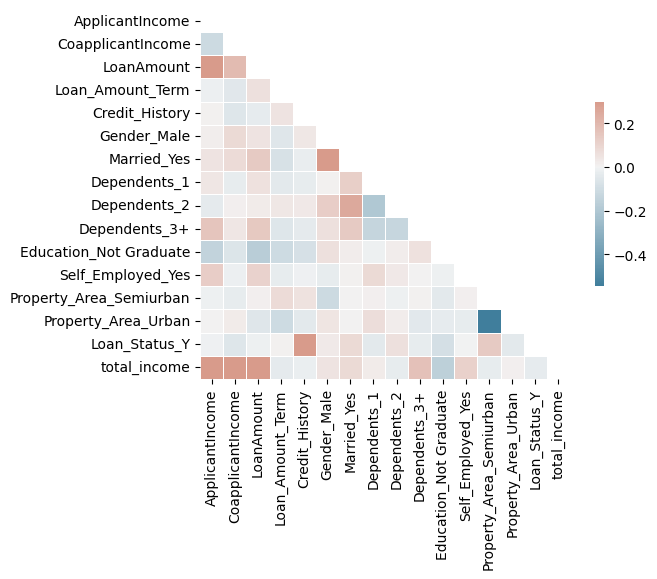

In [12]:
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(X.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Logistic model

fit the model

In [77]:
np.random.seed(42)
logistic_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [79]:
y_pred_logistic = logistic_model.predict(X_test)
print(logistic_model.intercept_)
print(logistic_model.coef_)

[-0.07419869]
[[ 4.70931362e-06 -3.39106170e-05  1.06698937e-03 -2.63223505e-03
   2.11623384e+00  1.08860435e-01  2.58584512e-01 -2.85564909e-01
   2.67786551e-01 -2.51988743e-01 -4.97038099e-01 -7.37433838e-03
   6.11652285e-01  1.49127739e-01 -2.92013039e-05]]


In [80]:
confusion_matrix(y_test, y_pred_logistic)

array([[ 4, 10],
       [ 0, 25]])

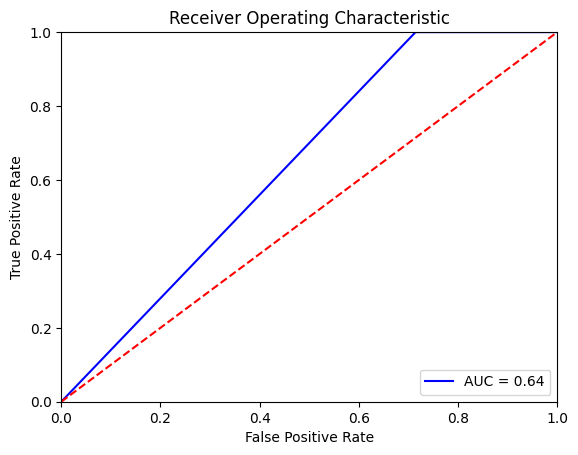

In [81]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_logistic)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
confusion_matrix(y_test, y_pred_logistic)

array([[ 4, 10],
       [ 0, 25]])

In [82]:
mean_squared_error(y_test, y_pred_logistic)

0.2564102564102564

In [83]:
# accuracy = 1 - MSE
1-mean_squared_error(y_test, y_pred_logistic)

0.7435897435897436

#Gradient Boosting Model

In [44]:
np.random.seed(40)
loan_boost_base = GradientBoostingClassifier(random_state=1)
loan_boost_base.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [45]:
loan_boost_slow_many = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.025,random_state=1)
loan_boost_slow_many.fit(X_train, y_train)
loan_boost_slow_many_pred = loan_boost_slow_many.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, loan_boost_slow_many_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.6690921690921692

In [46]:
loan_boost_slow_few = GradientBoostingClassifier(n_estimators=400, learning_rate=0.025,random_state=1)
loan_boost_slow_few.fit(X_train, y_train)
loan_boost_slow_few_pred = loan_boost_slow_few.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, loan_boost_slow_few_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.6742896742896742

In [47]:
loan_boost = GradientBoostingClassifier(n_estimators=400, learning_rate=0.025,random_state=1)
loan_boost.fit(X_train, y_train)
loan_boost_preds = loan_boost.predict_proba(X_test)

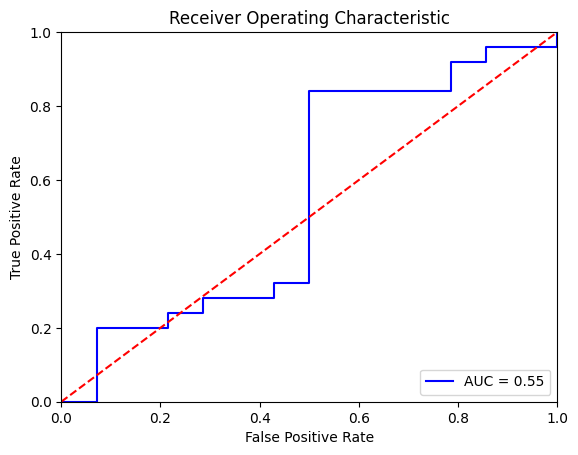

In [48]:
fpr, tpr, threshold = roc_curve(y_test, loan_boost_preds[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
confusion_matrix(y_test, loan_boost_preds[:,1]> 0.5)

array([[ 6,  8],
       [ 4, 21]])

In [86]:
8/(6+8)

0.5714285714285714

In [49]:
mean_squared_error(y_test, loan_boost_preds[:,1]> 0.5)

0.3076923076923077

#Random forest

In [50]:
np.random.seed(42)
loan_rf = RandomForestClassifier(random_state=1)
loan_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [51]:
loan_rf_pred = loan_rf.predict_proba(X_test)

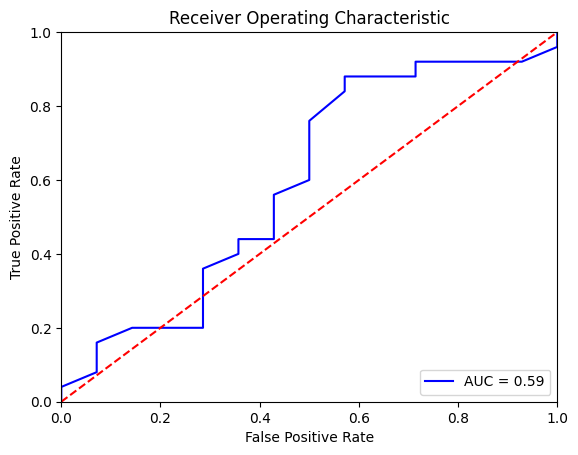

In [52]:
fpr, tpr, threshold = roc_curve(y_test, loan_rf_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
confusion_matrix(y_test, loan_rf_pred[:,1]> 0.5)

array([[ 4, 10],
       [ 3, 22]])

In [54]:
mean_squared_error(y_test,loan_rf_pred[:,1])

0.24064871794871792

#Neural Net

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,total_income
0,5849.0,0.0,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,5849.0
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,6091.0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1,3000.0
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1,4941.0
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1,2900.0
610,4106.0,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1,4106.0
611,8072.0,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1,8312.0
612,7583.0,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1,7583.0


In [32]:
inputs = keras.Input(shape=(15,))
x = layers.Dense(6, activation="relu", name="dense_1")(inputs)
x = layers.Dense(5, activation="relu", name="dense_2")(x)
x = layers.Dense(4, activation="sigmoid", name="dense_3")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
loan_nnet = keras.Model(inputs=inputs, outputs=outputs)
loan_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [ ]:
np.random.seed(42)
history = loan_nnet.fit(
  X_train,
  y_train,
  batch_size=35,
  epochs=1000
)

In [34]:
loan_nnet_val_preds = loan_nnet.predict(X_val)

4/4 [==============================] - 0s 3ms/step


In [35]:
loan_nnet_preds = loan_nnet.predict(X_test)

2/2 [==============================] - 0s 5ms/step


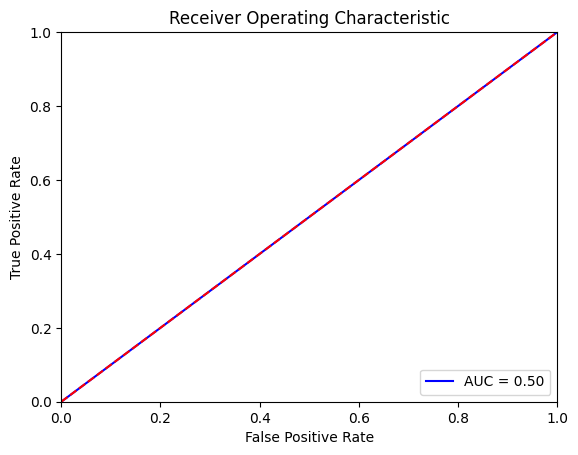

In [87]:
fpr, tpr, threshold = roc_curve(y_test, loan_nnet_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
confusion_matrix(y_test, loan_nnet_preds>0.5)

array([[ 0, 14],
       [ 0, 25]])

In [88]:
mean_squared_error(y_test,loan_nnet_preds)

0.23259632

In [72]:
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd

models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural nets']  # Add your model names here
y_true_dict = {'Logistic Regression': y_test, 'Random Forest': y_test, 'Gradient Boosting': y_test, 'Neural nets': y_test}
y_pred_dict = {'Logistic Regression': y_pred_logistic, 'Random Forest': loan_rf_pred[:,1]>0.5, 'Gradient Boosting': loan_boost_preds[:,1]>0.5, 'Neural nets': loan_nnet_preds>0.5}

mse_list = []
accuracy_list = []

for model_name in models:
    y_true = y_true_dict[model_name]
    y_pred = y_pred_dict[model_name]

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    mse_list.append(mse)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_list.append(accuracy)

results_df = pd.DataFrame({'Model': models, 'MSE': mse_list, 'Accuracy': accuracy_list})
print(results_df.iloc[:,1:])


        MSE  Accuracy
0  0.256410  0.743590
1  0.333333  0.666667
2  0.307692  0.692308
3  0.358974  0.641026


In [75]:
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
from tabulate import tabulate  # Import the tabulate module

# Assuming you have true labels and predictions for each model
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural nets']  # Add your model names here
y_true_dict = {'Logistic Regression': y_test, 'Random Forest': y_test, 'Gradient Boosting': y_test, 'Neural nets': y_test}
y_pred_dict = {'Logistic Regression': y_pred_logistic, 'Random Forest': loan_rf_pred[:,1]>0.5, 'Gradient Boosting': loan_boost_preds[:,1]>0.5, 'Neural nets': loan_nnet_preds>0.5}

# Initialize empty lists to store MSE and accuracy
mse_list = []
accuracy_list = []

# Iterate through models
for model_name in models:
    y_true = y_true_dict[model_name]
    y_pred = y_pred_dict[model_name]

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    mse_list.append(mse)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_list.append(accuracy)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Model': models, 'MSE': mse_list, 'Accuracy': accuracy_list})

# Print the prettified table
print(tabulate(results_df.iloc[:, 1:], headers='keys', tablefmt='pretty'))
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
from tabulate import tabulate  # Import the tabulate module

# Assuming you have true labels and predictions for each model
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural nets']  # Add your model names here
y_true_dict = {'Logistic Regression': y_test, 'Random Forest': y_test, 'Gradient Boosting': y_test, 'Neural nets': y_test}
y_pred_dict = {'Logistic Regression': y_pred_logistic, 'Random Forest': loan_rf_pred[:,1]>0.5, 'Gradient Boosting': loan_boost_preds[:,1]>0.5, 'Neural nets': loan_nnet_preds>0.5}

# Initialize empty lists to store MSE and accuracy
mse_list = []
accuracy_list = []

# Iterate through models
for model_name in models:
    y_true = y_true_dict[model_name]
    y_pred = y_pred_dict[model_name]

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    mse_list.append(mse)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_list.append(accuracy)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Model': models, 'MSE': mse_list, 'Accuracy': accuracy_list})

# Print the prettified table
print(tabulate(results_df, headers='keys', tablefmt='pretty'))


+---+--------------------+--------------------+
|   |        MSE         |      Accuracy      |
+---+--------------------+--------------------+
| 0 | 0.2564102564102564 | 0.7435897435897436 |
| 1 | 0.3333333333333333 | 0.6666666666666666 |
| 2 | 0.3076923076923077 | 0.6923076923076923 |
| 3 | 0.358974358974359  | 0.6410256410256411 |
+---+--------------------+--------------------+
+---+---------------------+--------------------+--------------------+
|   |        Model        |        MSE         |      Accuracy      |
+---+---------------------+--------------------+--------------------+
| 0 | Logistic Regression | 0.2564102564102564 | 0.7435897435897436 |
| 1 |    Random Forest    | 0.3333333333333333 | 0.6666666666666666 |
| 2 |  Gradient Boosting  | 0.3076923076923077 | 0.6923076923076923 |
| 3 |     Neural nets     | 0.358974358974359  | 0.6410256410256411 |
+---+---------------------+--------------------+--------------------+
